In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import interpolate

In [72]:
import scipy

In [73]:
import pandas as pd

In [74]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [75]:
from scipy.interpolate import interp1d

In [76]:
from dvr_setup_and_plotting_utils import *

85.6992
potential written
dvr is set up


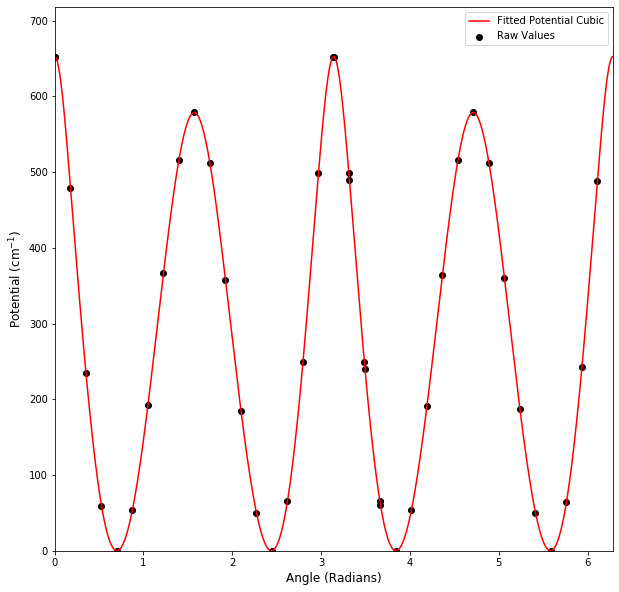

In [77]:
# Run and collect ground state

# Reduced mass of freqency calculation =  3.5708    AMU

mass_ground = 3.5708*1836*24
print(str(mass_ground/1836))

num_wavefunctions_ground = 5
grid_points = 500


fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='gs_scan_no_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='gs_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.00)

print('potential written')

setup_dvr(num_states=num_wavefunctions_ground,num_grid_points=grid_points,mass=mass_ground,
                         potential_energy_file_name='gs_scan_no_water_fitted.dat',
                        output_file_name='gs_scan_no_h2o')

print('dvr is set up')
# Now need to make the output potential the potential_file.dat and run 
# ./dvr_1d_periodic

In [78]:
# At this point in the directory where the files are made
# ! cp gs_scan_no_water_fitted.dat  potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above
# User must supply their own matrix diagonalization subroutine


78.72919999999999
potential written
dvr is set up


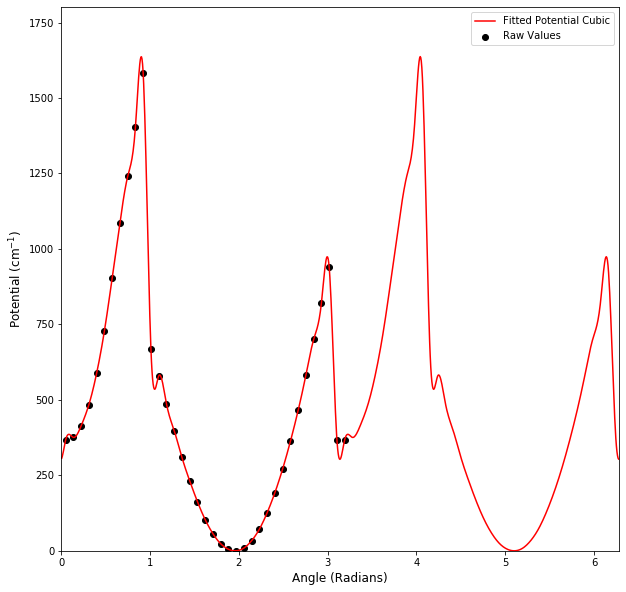

In [79]:
# run DVR
# Now run excited state

mass_excited =   3.5786*1836*22
num_wavefunctions_excited = 200
print(str(mass_excited/1836))

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='es_scan_no_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='es_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.0)

print('potential written')

setup_dvr(num_states=num_wavefunctions_excited,num_grid_points=grid_points,mass=mass_excited,
                         potential_energy_file_name='es_scan_no_water_fitted.dat',
                        output_file_name='es_scan_no_h2o')

print('dvr is set up')

In [51]:
# At this point in the directory where the files are made
# ! cp es_scan_no_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above

In [54]:
# Absolute value of overlaps is calculated here

In [55]:
wavefunction_overlaps = read_wavefunctions_calculate_overlaps_vib_shift(
                                         ground_state_file_name_root='gs_scan_no_h2o',
                                         excited_state_file_name_root='es_scan_no_h2o',
                                         max_num_ground_state_wfs=4,
                                         max_num_excited_state_wfs=100,
                                         ground_state_max_energy=300,
                                         excited_state_max_energy=3000,
                                         vib_shift=263.0,
                                        vib_scale=1.0)

Calculating overlap for transition with energy 0.0
Calculating overlap for transition with energy 2.3492558617062396e-08
Calculating overlap for transition with energy 53.27884503687514
Calculating overlap for transition with energy 53.27884506022969
Calculating overlap for transition with energy 106.65279577262548
Calculating overlap for transition with energy 106.65279586194399
Calculating overlap for transition with energy 159.67006579820608
Calculating overlap for transition with energy 159.67006585074645
Calculating overlap for transition with energy 212.18737127606178
Calculating overlap for transition with energy 212.1873714326768
Calculating overlap for transition with energy 263.99781994020947
Calculating overlap for transition with energy 263.9978199706632
Calculating overlap for transition with energy 315.33269031331173
Calculating overlap for transition with energy 315.33269040551727
Calculating overlap for transition with energy 366.39258729693245
Calculating overlap for t

Calculating overlap for transition with energy 1320.6738194594318
Calculating overlap for transition with energy 1325.7963645817772
Calculating overlap for transition with energy 1367.124195883828
Calculating overlap for transition with energy 1374.8705142521935
Calculating overlap for transition with energy 1413.9779574930421
Calculating overlap for transition with energy 1425.4283729646995
Calculating overlap for transition with energy 1460.3771931896295
Calculating overlap for transition with energy 1475.7726744429783
Calculating overlap for transition with energy 1510.3394087923086
Calculating overlap for transition with energy 1530.4691897171992
Calculating overlap for transition with energy 1559.3361755015353
Calculating overlap for transition with energy 1584.8331683281824
Calculating overlap for transition with energy 1611.0952747825793
Calculating overlap for transition with energy 1641.8967968554548
Calculating overlap for transition with energy 1663.9652054924868
Calculating

Calculating overlap for transition with energy 613.2583263877589
Calculating overlap for transition with energy 613.2583356231333
Calculating overlap for transition with energy 660.7479347952764
Calculating overlap for transition with energy 660.7479393031618
Calculating overlap for transition with energy 709.5839600557761
Calculating overlap for transition with energy 709.584043398175
Calculating overlap for transition with energy 722.3273930709299
Calculating overlap for transition with energy 722.3287132656972
Calculating overlap for transition with energy 761.6430501821668
Calculating overlap for transition with energy 761.6432098123586
Calculating overlap for transition with energy 814.9294428536147
Calculating overlap for transition with energy 814.9303273889169
Calculating overlap for transition with energy 842.4863915054573
Calculating overlap for transition with energy 842.4891274963071
Calculating overlap for transition with energy 874.9115792734332
Calculating overlap for tr

In [56]:
#This produces a list of dictionaries
# Showing example
wavefunction_overlaps[0]

{'energy': 0.0,
 'ground_state_id': 'gs_scan_no_h2o_0',
 'excited_state_id': 'es_scan_no_h2o_0',
 'overlap': 0.008428426839652683}

In [57]:
overlap_df = pd.DataFrame(wavefunction_overlaps)

In [58]:
# Initial spectral plots

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


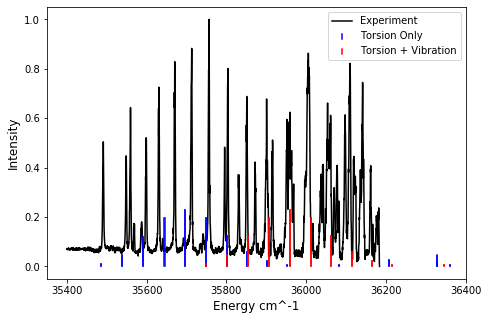

In [59]:
# Now, convert from a.u. to cm^-1, plot stem plot and compare to the experimental spectrum

offset = 35485

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm^-1', fontsize = 12)
ax.set_ylabel('Intensity', fontsize = 12)
# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,36400)
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity,label='Experiment', color='k',ls='-')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

# Might need to normalize

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)

#ax.stem(vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='All',
#       basefmt=" ")

ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

#print(wavefunction_ground_vib_state_for_plotting_df)

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


#ax.stem(ground_vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        ground_vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='n=0 ground origin',
 #      basefmt=" ")

ax.legend()
plt.savefig('./theory_exp_spectrum_compare_mass_no_water_zpe_for_presentation.pdf')
plt.show()

In [60]:
# Plot now with linewidth
# Reads in a list of frequencies and intensities
# Then produces two text files that have the right spectrum
def calc_spectrum_plot(freq_list=None,int_list=None,
                       min_freq=0.0,max_freq=0.0,width=1,resolution=0.05):
    
    num_points = int((max_freq-min_freq)/(resolution))
    
    frequencies = list()
    intensities = list()
    
    for i in range(0,num_points):
        frequency = min_freq+i*resolution
        intensity = 0.0
        
        for j in range(0,len(freq_list)):
            peak_center = freq_list[j]
            peak_height = int_list[j]
           # print(peak_center)
           # print(peak_height)
            intensity = intensity + peak_height*np.exp(-(frequency - peak_center)**2/(2*width))
    
        frequencies.append(frequency)
        intensities.append(intensity)
    
    return frequencies,intensities


In [61]:
theory_frequencies,theory_intensities = calc_spectrum_plot(
                    freq_list=vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset,
                    int_list=vibrational_state_overlaps_df['overlap'],
                       min_freq=offset-100,max_freq=offset+3000,width=10.0,resolution=1.0)

In [62]:
# Plot with both spectra on each other
# Two versions, one narrow range, one wider range

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


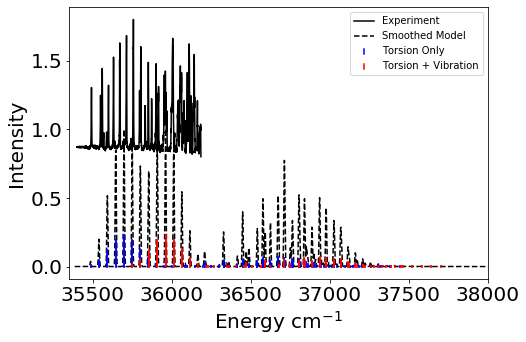

In [63]:
# Wide range

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,38000)

max_freq = 38000
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)


ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_masses_no_water_zpe_for_presentation_wide_range.pdf',bbox_inches='tight')
plt.show()



/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


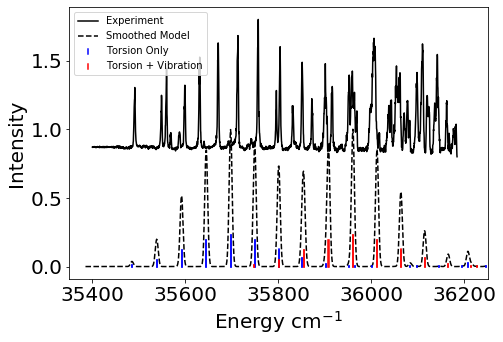

In [65]:
# Narrow Range

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,36250)

max_freq = 36250
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)


ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_masses_no_water_zpe_for_presentation_narrow_range.pdf',bbox_inches='tight')
plt.show()



In [66]:
# Plot the lowest 4 ground state wavefunctions
ground_state_file_name_root='gs_scan_no_h2o'
excited_state_file_name_root='es_scan_no_h2o'
max_num_ground_state_wfs=4
max_num_excited_state_wfs=100


In [67]:
ground_state_dict = read_dvr_output(filename_root=ground_state_file_name_root,num_states=max_num_ground_state_wfs)
excited_state_dict = read_dvr_output(filename_root=excited_state_file_name_root,num_states=max_num_excited_state_wfs)


Examining state gs_scan_no_h2o_0


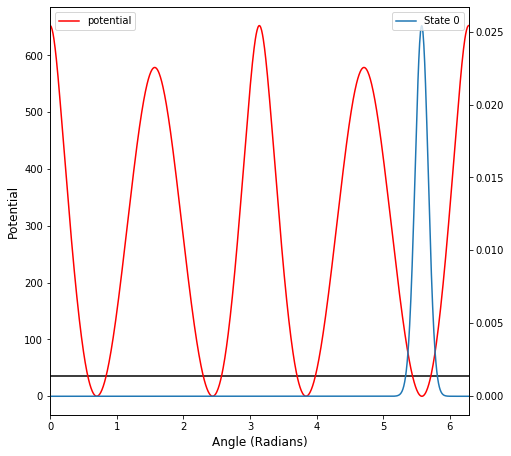

Examining state gs_scan_no_h2o_1


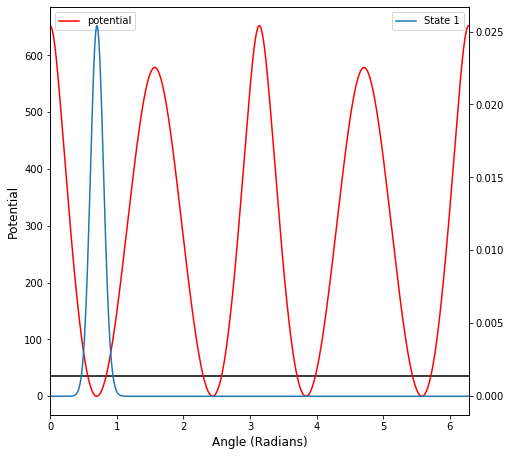

Examining state gs_scan_no_h2o_2


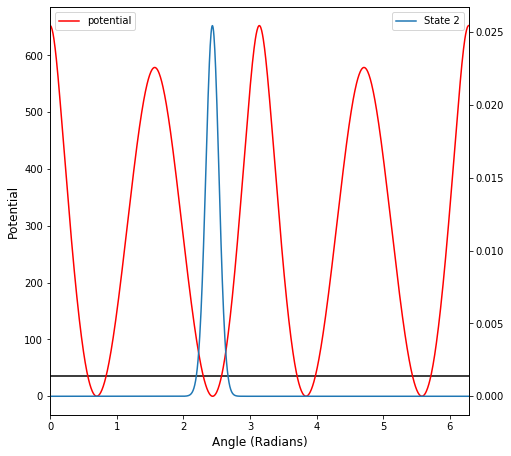

Examining state gs_scan_no_h2o_3


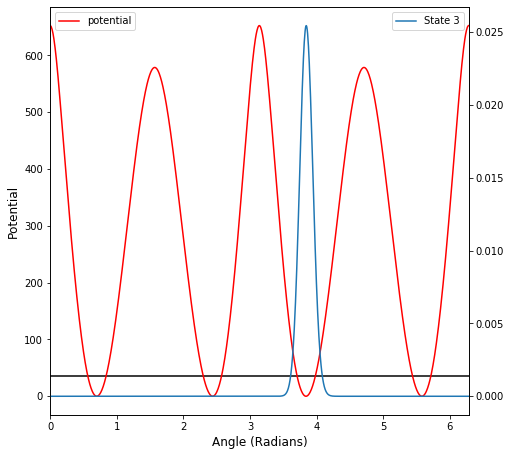

In [68]:
# plot the potential and square of the wavefunction 
# (avoids ambiguity on signs) of the ground state potential

wavefunction_counter = 0

max_wavefunctions = 4

for i in range(0,4):
    plot_wavefunction_squared(state_dict=ground_state_dict,
                        state_num=i,prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground)

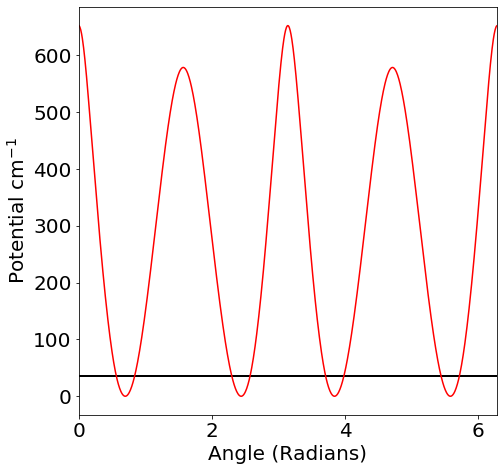

In [69]:
plot_potential_and_energy_levels(state_dict=ground_state_dict,
                       prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground,max_energy=200)

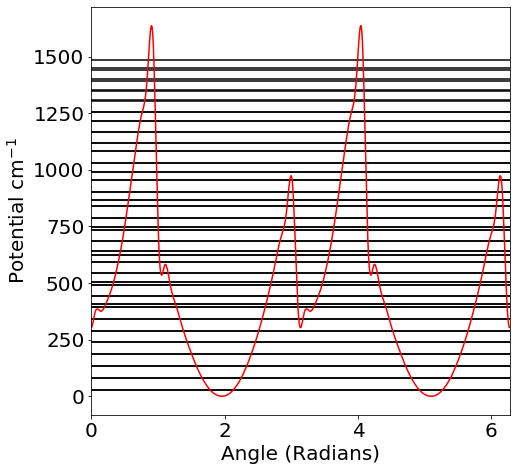

In [70]:
plot_potential_and_energy_levels(state_dict=excited_state_dict,
                       prefix="es_scan_no_h2o",
                      plotting_potential_name="es_scan_no_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground,max_energy=1500)

In [26]:
# Get maximum overlaps so we can plot those excited state wavefunctions
overlap_df.sort_values(by=['overlap'],ascending=False).head(60)

,energy,ground_state_id,excited_state_id,overlap
416,0.000966,gs_scan_no_h2o_2,es_scan_no_h2o_8,0.224191
417,0.002165,gs_scan_no_h2o_2_vib_excited,es_scan_no_h2o_8_vib_excited,0.224191
18,0.000967,gs_scan_no_h2o_0,es_scan_no_h2o_9,0.223868
19,0.002165,gs_scan_no_h2o_0_vib_excited,es_scan_no_h2o_9_vib_excited,0.223868
413,0.001925,gs_scan_no_h2o_2_vib_excited,es_scan_no_h2o_6_vib_excited,0.195245
412,0.000727,gs_scan_no_h2o_2,es_scan_no_h2o_6,0.195245
14,0.000728,gs_scan_no_h2o_0,es_scan_no_h2o_7,0.194238
15,0.001926,gs_scan_no_h2o_0_vib_excited,es_scan_no_h2o_7_vib_excited,0.194238
22,0.001203,gs_scan_no_h2o_0,es_scan_no_h2o_11,0.190843
23,0.002401,gs_scan_no_h2o_0_vib_excited,es_scan_no_h2o_11_vib_excited,0.190843


In [27]:
# Export overlap to csv file

overlap_df.to_csv('./phpy_overlap_list_no_zpe.csv')